In [1]:
import os
import glob
import xarray as xr
import matplotlib

## List all data files

In [2]:
data_path = '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/'
file_list = glob.glob(data_path + '*.raw')
file_list.sort()
file_list

['/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T000000.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T013841.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T031743.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T045644.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T063550.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T081451.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T095354.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T113306.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T131207.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T145109.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T163010.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T180922.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T194823.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T212724.raw',
 '/Volumes/wjlee_apl

In [3]:
# Files from Aug 21, 2017 local time
file_list[19:35]

['/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T113343.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T131245.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T145147.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T163049.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T180952.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T194853.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T212802.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T230706.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T000000.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T013902.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T031804.raw',
 '/Volumes/wjlee_apl

## Convert EK60 ``.raw`` to ``.nc`` files

In [4]:
from echopype.convert import ConvertEK60

In [5]:
for fname in file_list[19:35]:
    data_tmp = ConvertEK60(fname)
    data_tmp.raw2nc()

01:20:27  converting file: OOI-D20170821-T063618.raw
01:20:31  converting file: OOI-D20170821-T081522.raw
01:20:35  converting file: OOI-D20170821-T095435.raw
01:20:39  converting file: OOI-D20170821-T113343.raw
01:20:42  converting file: OOI-D20170821-T131245.raw
01:20:46  converting file: OOI-D20170821-T145147.raw
01:20:50  converting file: OOI-D20170821-T163049.raw
01:20:53  converting file: OOI-D20170821-T180952.raw
01:20:57  converting file: OOI-D20170821-T194853.raw
01:21:00  converting file: OOI-D20170821-T212802.raw
01:21:04  converting file: OOI-D20170821-T230706.raw
01:21:05  converting file: OOI-D20170822-T000000.raw
01:21:09  converting file: OOI-D20170822-T013902.raw
01:21:13  converting file: OOI-D20170822-T031804.raw
01:21:16  converting file: OOI-D20170822-T045705.raw
01:21:20  converting file: OOI-D20170822-T063606.raw


## Calibrate data, denoise, and calculate MVBS

In [6]:
from echopype.model import EchoDataEK60

In [7]:
for fname in file_list[19:35]:
    data = EchoDataEK60(fname[:-4]+'.nc')
    data.MVBS_ping_size = 30
    data.MVBS_range_bin_size = 2.5
    data.calibrate(save=True,)  # Calibration and echo-integration
    data.remove_noise(save=True)  # Save denoised Sv to FILENAME_Sv_clean.nc
    data.get_MVBS(save=True)
    os.remove(fname[:-4]+'_Sv.nc')

01:21:25  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618_Sv.nc
01:21:37  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618_Sv_clean.nc
01:21:40  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618_MVBS.nc
01:21:42  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522_Sv.nc
01:21:53  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522_Sv_clean.nc
01:21:56  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522_MVBS.nc
01:21:58  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435_Sv.nc
01:22:08  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435_Sv_clean.nc
01:22:11  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435_MVBS.nc
01:22:13  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T11

## Opening and Visualizing the Results in Parallel

In [13]:
res = xr.open_mfdataset(data_path+'*MVBS.nc')

In [14]:
res

<xarray.Dataset>
Dimensions:                   (frequency: 3, ping_time: 3066, range_bin: 83)
Coordinates:
  * frequency                 (frequency) float32 120000.0 38000.0 200000.0
  * range_bin                 (range_bin) int64 0 13 26 39 ... 1040 1053 1066
  * ping_time                 (ping_time) datetime64[ns] 2017-08-21T06:36:18.558000128 ... 2017-08-22T08:14:55.829000192
Data variables:
    MVBS                      (frequency, ping_time, range_bin) float64 dask.array<shape=(3, 3066, 83), chunksize=(3, 198, 83)>
    noise_est_range_bin_size  (ping_time, frequency) float32 dask.array<shape=(3066, 3), chunksize=(198, 3)>
    sample_thickness          (ping_time, frequency) float32 dask.array<shape=(3066, 3), chunksize=(198, 3)>
Attributes:
    noise_est_ping_size:  30

In [15]:
import matplotlib.pyplot as plt

In [16]:
res.coords['depth'] = res.range_bin * res.sample_thickness.sel(frequency=200000).isel(ping_time=0).values
res.coords['depth'] = res.coords['depth'].max() - res.coords['depth']

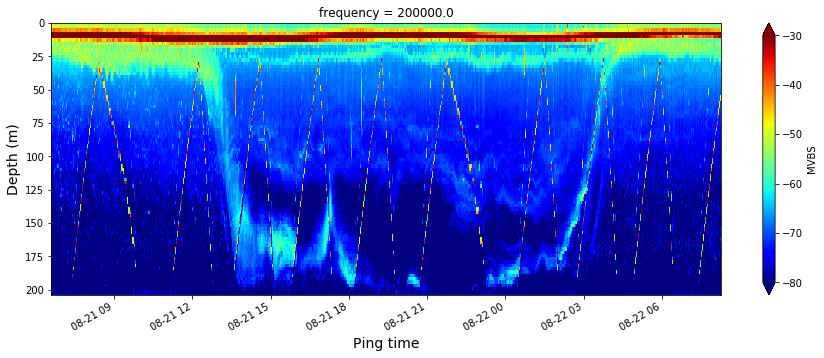

In [17]:
echogram = res.MVBS.sel(frequency=200000).plot(x='ping_time',y='depth',cmap='jet',
                                               vmin=-80,vmax=-30,
                                               aspect=3, size=5)
plt.ylim(res.coords['depth'].max(), 0)
plt.xlabel('Ping time', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.show()